## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


MARKET UNDERSTANDING
 - film industry
 - Joining a competitive field where other originally-tech-based companies are openning film studios
   - Amazon, Netflix, Hulu
 - Understands its huge Tech company, going in with that context ->
   - They will garner much attention with initial releases
  
BUSINESS PROBLEM
 - Microsoft wants to open a film studio
 - important questions
   
 - With little knowledge of how to make films, we will provide data-driven actionable insights to maximize profit, visibility and reception
   - they have the financial and authorative means to tackle difficult problems


DATA
 - imdb
 - The Numbers
 - Kaggle's The Movies Dataset: 
   - an ensemble of data collected from TMDB and GroupLens:
   - https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/versions/5resource=download&select=movies_metadata.csv
   
ASSUMPTIONS
 - Considering only movies 2013-2019, Tied to the Modern era Streaming service boom in film industry, and our limited dataset

Conclusion


 - Joining a competitive field where other originally-tech-based companies who open a film studio, also have streaming service
   - Amazon, Netflix, Hulu
 - Reach us at our linkedin for more data consulting

3 ACIONABLE INSIGHTS:
 - Spending more correlates to greater Profit in filmmaking
 - GENRES / RUNTIME per genre suggestion based on Profit
   - Top genre combinations and its relationship to spending and Profit
   - Successful Genres have significant runtime variance, suggesting runtime per genre
 - Suggestion of gender for each of the top genres
   - Male lead actors lead to slightly higher ratings and Profit, but show much more representation
     and Microsoft has the opportunity to partake in changes to skew the distribution with little
     loss in Profit
 

Improvements
 - adjust currency values to inflation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import calendar
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Importing all the Data

## imdb

In [2]:
%%bash
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [3]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
conn.close()

## TN movie budgets

In [4]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

budgets_df.drop(columns=['id'], inplace=True)
# convert dates and prices from strings to numbers
budgets_df['release_year'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: x.replace('$','').replace(',','')).astype('int64')
budgets_df['foreign gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]
print(budgets_df.shape)
# merge with imdb
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on=['primary_title','start_year'],
                                     suffixes=['_imdb','_budgets'],
                                     right_on=['movie','release_year'])
print(df_with_budgets.shape)

# modern_budgets_df since 2013
modern_budgets_df_reset = budgets_df.loc[budgets_df['release_year'] >= 2013]
modern_budgets_df = modern_budgets_df_reset.copy()

(5415, 8)
(1422, 14)


# Cost vs Profit

RESET MODERN_BUDGETS_DF

In [5]:
modern_budgets_df = modern_budgets_df_reset.copy() # 1216 x 8
modern_budgets_df.shape

(1216, 8)

EXCLUDE MODERN_BUDGETS_DF   PROFIT OUTLIERS

In [6]:
# THIS WILL SET MODERN BUDGETS TO EXCLUDE 150/1216 PROFIT OUTLIERS
modern_budgets_df = modern_budgets_df_reset.copy() # 1216 x 8
iqr = modern_budgets_df['profit'].quantile(.75) - modern_budgets_df['profit'].quantile(.25)
upper_bound = modern_budgets_df.profit.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.profit.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.profit < upper_bound) & \
                                          (modern_budgets_df.profit > lower_bound)]

dataset cost v profit

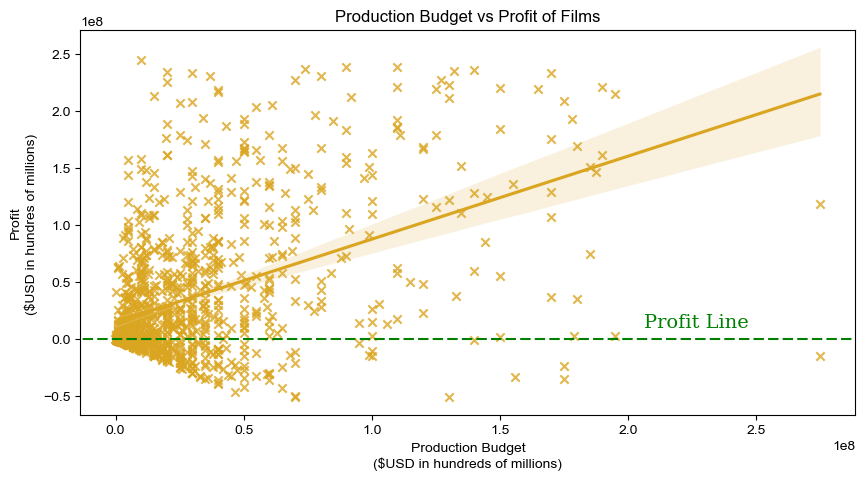

0.7777708411019403

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')
sns.regplot(x='production_budget',
            y='profit',
            data=modern_budgets_df,
            scatter=True,
            color='goldenrod',
            marker='x',
            ax=ax)

plt.plot(range(0,-50000000))
plt.axhline(0,modern_budgets_df.production_budget.max(),0, color='green', dashes=[5,2])


ax.text(modern_budgets_df.production_budget.max()*.75,10000000,'Profit Line', fontdict={'family': 'serif',
                                                                                        'color':  'Green',
                                                                                        'weight': 'normal',
                                                                                        'size': 14,
                                                                                        })

ax.set_xlabel('Production Budget\n($USD in hundreds of millions)')
ax.set_ylabel('Profit\n($USD in hundres of millions) ')
ax.set(title='Production Budget vs Profit of Films')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

# Genre vs profit

MULTI-Genre grouping

In [8]:
# profit_genreTuples_df has genres tuples for each film split (exploded) into multiple rows
genreTuples_df = movie_basics_df.dropna(subset=['genres'])[['movie_id',
                                                            'primary_title',
                                                            'start_year',
                                                            'genres']]
genreTuples_df['genres'] = genreTuples_df['genres'].map(lambda x: tuple(x.split(',')))
profit_genreTuples_df = modern_budgets_df.merge(genreTuples_df,
                                                how='inner',
                                                left_on=['movie',
                                                         'release_year'],
                                                right_on=['primary_title', 
                                                          'start_year'])[['movie',
                                                                          'release_year',
                                                                          'profit',
                                                                          'genres']]
# FOR CONCATENATED VERSION
exploded = profit_genreTuples_df.explode('genres')

# ONLY EXPLODING 3-GRAMS INTO 2-GRAMS
for i in profit_genreTuples_df.index:
    row = profit_genreTuples_df.iloc[i]
        
    genres = row['genres']
    if len(genres) == 3:
        new_row = {col:row[col] for col in row.index.to_list()}

        # genres[0,1]
        new_row['genres'] = (genres[0],genres[1])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        
        # genres[0,2]
        new_row['genres'] = (genres[0],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        
        # genres[1,2]
        new_row['genres'] = (genres[1],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)


# REMOVING 3-GRAMS
def keep_3_grams(keep, x):
    if keep:
        return len(x) >= 2
    else:
        return len(x) == 2

three_or_two_grams = \
    profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: \
                                                                  True if keep_3_grams(True,x) else False)]

# for some reason exploded has duplicates
profit_genreTuples_df = pd.concat([three_or_two_grams,exploded]).drop_duplicates()
profit_genreTuples_df

,movie,release_year,profit,genres
0,Solo: A Star Wars Story,2018,118151347,"(Action, Adventure, Fantasy)"
1,The Lone Ranger,2013,-14997885,"(Action, Adventure, Western)"
2,The Mummy,2017,214953905,"(Action, Adventure, Fantasy)"
3,Jack the Giant Slayer,2013,2687603,"(Adventure, Fantasy)"
4,The Great Gatsby,2013,161040419,"(Drama, Romance)"
...,...,...,...,...
786,Counting,2015,-41626,Documentary
787,Emily,2017,-23453,Drama
788,Exeter,2015,464792,Horror
788,Exeter,2015,464792,Mystery


In [9]:
""" FOR LABELLING GENRE PLOT"""
def get_pretty_labels(ugly):
    labels = []
    for genre in ugly:
        if type(genre) == tuple:
            if len(genre) == 3:
                labels.append('{}, {} & {}'.format(genre[0],genre[1],genre[2]))
            if len(genre) == 2:
                labels.append('{} & {}'.format(genre[0],genre[1]))
        else:
            labels.append(genre)
    return labels

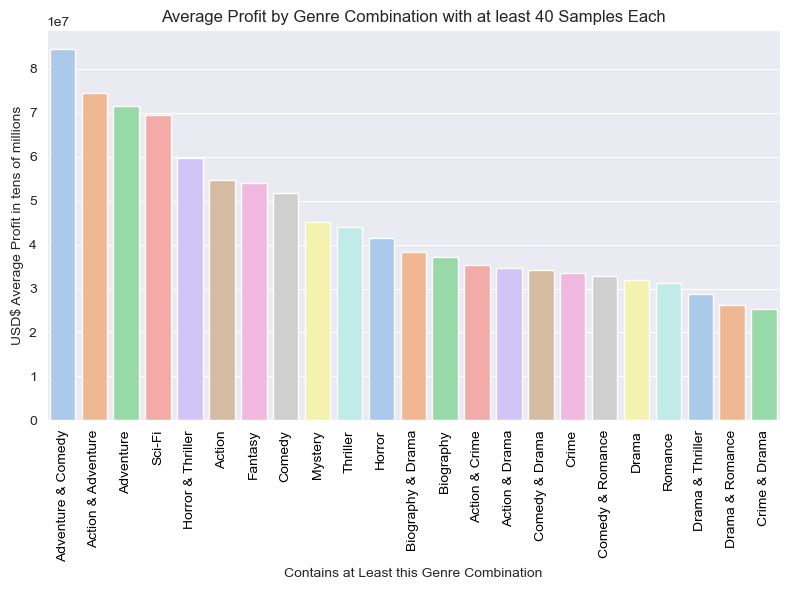

In [10]:
# DATA FOR PROFIT PER GENRETUPLES WITH AT LEAST n SAMPLES EACH
num_samples_per_genre_tuple = 40

# reset grouped_tuples so its not just the top 20
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# grouped_tuple_count_df has 129 unique genre-combo movies and single-genre movies (29 with over 30 samples)
grouped_tuple_count_df = profit_genreTuples_df.groupby('genres').count()
grouped_tuple_count_df = grouped_tuple_count_df.loc[grouped_tuple_count_df['profit'] > num_samples_per_genre_tuple]
tuple_profit_30samples_df = grouped_tuples_df.join(grouped_tuple_count_df, how='inner', rsuffix='_count').sort_values(by='profit', ascending=False)

fig, ax = plt.subplots(figsize=(8,6))

xlabels = get_pretty_labels(tuple_profit_30samples_df.index)
data = tuple_profit_30samples_df
ax = sns.barplot(x=data.index,
            y='profit',
            data=data,
            errwidth=0,
            palette='pastel',
            ax=ax)

ax.set_title('Average Profit by Genre Combination with at least {} Samples Each'.format(num_samples_per_genre_tuple))
ax.set_xlabel('Contains at Least this Genre Combination')
ax.set_ylabel('USD$ Average Profit in tens of millions')
ax.set_xticklabels(xlabels, rotation=90, color='black')
fig.tight_layout()
plt.show()


Top 1 Genre Highlighted Cost v Profit

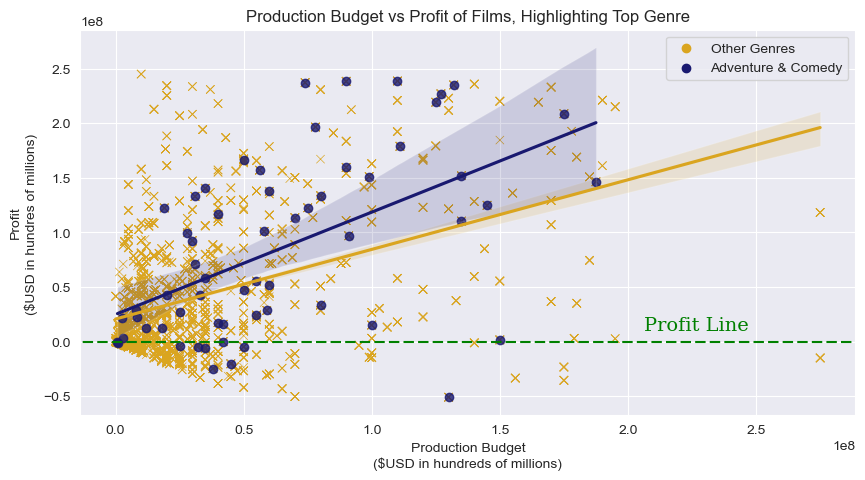

In [11]:
""" cost_v_profit_df has ['movie','release_year','genres' (optimized),'production_budget','profit'] """

cost_v_profit_df = profit_genreTuples_df.merge(modern_budgets_df[['movie','release_year','production_budget']],
                                               how='inner',
                                               left_on=['movie', 'release_year'],
                                               right_on=['movie','release_year'],
                                               suffixes=['_',''])

top_genre = [('Adventure', 'Comedy')]
top_loc = cost_v_profit_df['genres'].map(lambda x: True if x in top_genre else False)
cost_v_profit_df['is_top_genre'] = top_loc.map(lambda x: 'Adventure & Comedy' if x else 'Other Genres')

fig, ax = plt.subplots(figsize=(10,5))

# sns.regplot(x='production_budget',
#             y='profit',
#             data=modern_budgets_df,
#             scatter=True,
#             color='goldenrod',
#             marker='x',
#             ax=ax)
data = cost_v_profit_df
sns.scatterplot(x='production_budget',
                y='profit',
                hue='is_top_genre',
                legend='auto',
                data=data,
                palette=['goldenrod','midnightblue'],
                marker='x',
                ax=ax)

data = cost_v_profit_df.loc[~top_loc]
sns.regplot(x='production_budget',
            y='profit',
            scatter=False,
            color='goldenrod',
            data=data,
            ax=ax)

data = cost_v_profit_df.loc[top_loc]
sns.regplot(x='production_budget',
            y='profit',
            scatter=True,
            color='midnightblue',
            data=data,
            ax=ax)

# plotting reference lines and text
plt.plot(range(0,-50000000))
plt.axhline(0,modern_budgets_df.production_budget.max(),0, color='green', dashes=[5,2])

ax.text(modern_budgets_df.production_budget.max()*.75,10000000,'Profit Line', fontdict={'family': 'serif',
                                                                                        'color':  'Green',
                                                                                        'weight': 'normal',
                                                                                        'size': 14,
                                                                                        })

ax.set_xlabel('Production Budget\n($USD in hundreds of millions)')
ax.set_ylabel('Profit\n($USD in hundres of millions) ')
ax.set(title='Production Budget vs Profit of Films, Highlighting Top Genre')
sns.set_style('dark')
ax.legend(title='')
plt.show()

# Profit vs runtime

In [12]:
# CONSIDER IMPUTING MEAN/MEDIAN for 31k out of 146k 
runtime_df = movie_basics_df.dropna(subset=['runtime_minutes'])
runtime_df = runtime_df.loc[runtime_df['runtime_minutes'] < 200]
profit_runtime_df = modern_budgets_df.merge(runtime_df[['primary_title','start_year','runtime_minutes']],
                                            how='inner',
                                            left_on=['movie','release_year'],
                                            right_on=['primary_title','start_year'])
def get_length(x):
    short_bound = profit_runtime_df['runtime_minutes'].quantile(.33)
    long_bound = profit_runtime_df['runtime_minutes'].quantile(.66)
    if x < short_bound:
        return 'short'
    if x < long_bound:
        return 'medium'
    else:
        return 'long'
    

profit_runtime_df['length'] = profit_runtime_df['runtime_minutes'].map(get_length)

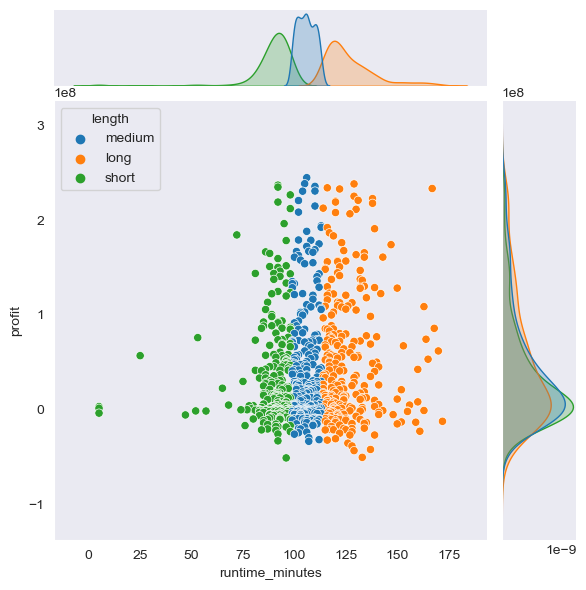

average movie runtimes per category: 
length
long      126.888060
medium    105.625468
short      88.879032
Name: runtime_minutes, dtype: float64

length value counts:
long      268
medium    267
short     248
Name: length, dtype: int64

average short profit: 33,817,284
average medium profit: 42,747,487
average long profit: 52,570,746


In [13]:
# look at runtime vs profit for the top_n highest profit films 
top_n = 783
# int(np.floor(783*.2)) # max n = 783

most_profit_df = profit_runtime_df.sort_values(by='profit', ascending=False).head(top_n)
sns.jointplot(x='runtime_minutes',
              y='profit',
              hue='length',
              data=most_profit_df,
              kind='scatter')

plt.show()
print("average movie runtimes per category: ")
print(most_profit_df.groupby('length').mean()['runtime_minutes'], end='\n\n')
print("length value counts:")
print(most_profit_df['length'].value_counts(), end='\n\n')
print("average short profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'short']['profit'].mean())))
print("average medium profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'medium']['profit'].mean())))
print("average long profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'long']['profit'].mean())))

### Runtime Distribution per top 5 Genres

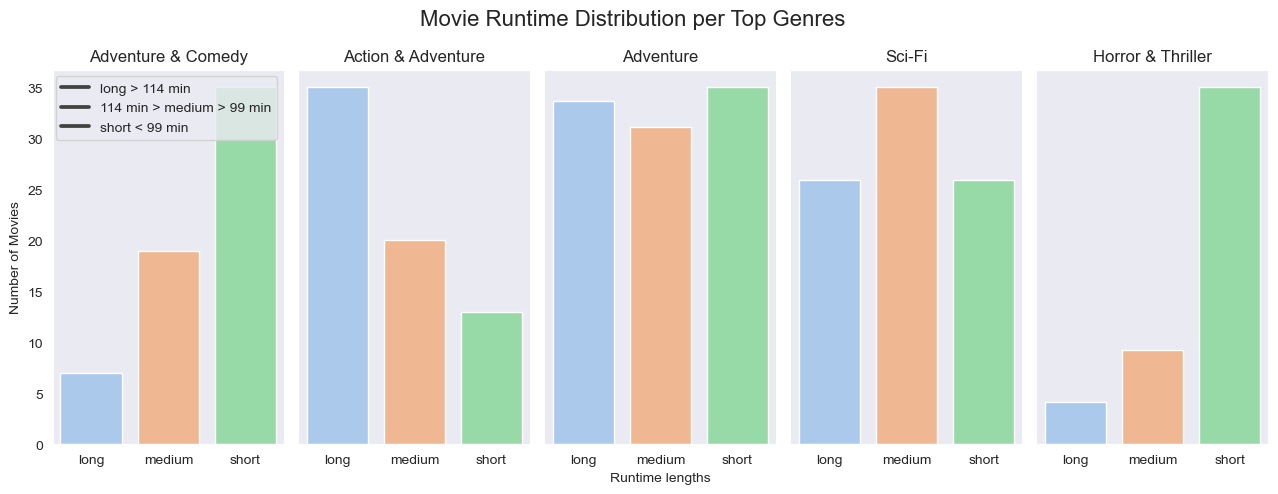

In [14]:
top5_genre_combos = b
left = most_profit_df[['movie','release_year','profit','runtime_minutes','length']]
right = profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: True if x in top5_genre_combos \
                                                                            else False)]
m = left.merge(right, how='inner', on=['movie','release_year'], suffixes=['_l','_r'])

genre_length_dfs = [m.loc[m['genres'] == genre] for genre in top5_genre_combos]




fig, ax = plt.subplots(ncols=5, figsize=(13,5))

titles = get_pretty_labels(top5_genre_combos)
for i, df in enumerate(genre_length_dfs):
    grouped = df.groupby('length').count()
    sns.barplot(x=grouped.index.to_list(), 
                y=grouped['movie'], 
                palette='pastel',
                ax=ax[i]).set(title=str(titles[i]))
    ax[i].set_ylabel('')
    ax[i].get_yaxis().set_visible(False)
    if i != 0: ax[i].spines[['right', 'left']].set_visible(False)
ax[0].spines[['right']].set_visible(False)
ax[len(titles)-1].spines[['right']].set_visible(True)
ax[0].get_yaxis().set_visible(True)
ax[0].set_ylabel('Number of Movies')
ax[len(titles)//2].set_xlabel('Runtime lengths')

ax[0].legend(['long > 114 min','114 min > medium > 99 min','short < 99 min'])
fig.suptitle('Movie Runtime Distribution per Top Genres', fontsize=16)

sns.set_style('dark')
plt.tight_layout()
plt.show()

# Lead Cast Gender Analysis

compare leading role cast gender with rating/REVENUE 
 - slight male dominated distributions, males have much more representation, on average results in higher 
   rating and revenue, !suggest the role of a large company to partake in skewing the distribution and
   changing the industry

In [15]:
credits_df = pd.read_csv('data/kaggle_data/credits.csv')
credits_df['cast'] = credits_df['cast'].map(lambda x: eval(x))
# drop nan cast rows
credits_df.drop(index=credits_df.loc[credits_df['cast'].map(lambda x: len(x) == 0)].index, inplace=True)

# sort the movie list by role (order), and get the movies leading cast gender
def get_lead_gender(movie):
    gender_id = sorted(movie, key=lambda x: x['order'])[0]['gender']
    if not gender_id: return gender_id
    return 'Male' if gender_id == 2 else 'Female'

# sort the movie list by role (order), and get the movies leading cast name
def get_lead_name(movie):
    return sorted(movie, key=lambda x: x['order'])[0]['name']

credits_df['cast_lead_gender'] = credits_df['cast'].map(get_lead_gender)
credits_df['cast_lead_name'] = credits_df['cast'].map(get_lead_name)
credits_df.drop(credits_df.loc[credits_df['cast_lead_gender'] == 0].index, inplace=True)
credits_df.drop(index=credits_df.loc[credits_df['id'].duplicated()].index, inplace=True)


In [16]:
meta_data_df = pd.read_csv('data/kaggle_data/movies_metadata.csv')
meta_data_df = meta_data_df[['id','imdb_id','title','release_date','revenue','runtime','vote_average','vote_count']]

# drop 3  with id values that are dates
meta_data_df.drop(index=meta_data_df.loc[~meta_data_df['id'].str.isnumeric()].index, inplace=True)

# set id column values to int
meta_data_df['id'] = meta_data_df['id'].astype(int)

# drop druplicate id's
meta_data_df.drop(index=meta_data_df.loc[meta_data_df['id'].duplicated()].index, inplace=True)

# drop movies pre 2013
meta_data_df.dropna(subset=['release_date'], inplace=True)
meta_data_df['release_date'] = meta_data_df['release_date'].map(lambda x: x[:4]).astype(int)
meta_data_df.drop(index=meta_data_df.loc[meta_data_df['release_date'] < 2013].index, inplace=True)


In [17]:
kaggle_cleaned_df = meta_data_df.merge(credits_df[['id','cast_lead_name','cast_lead_gender']],
                                       how='inner',
                                       on='id')


Gender vs movie ratings

num movies  3767


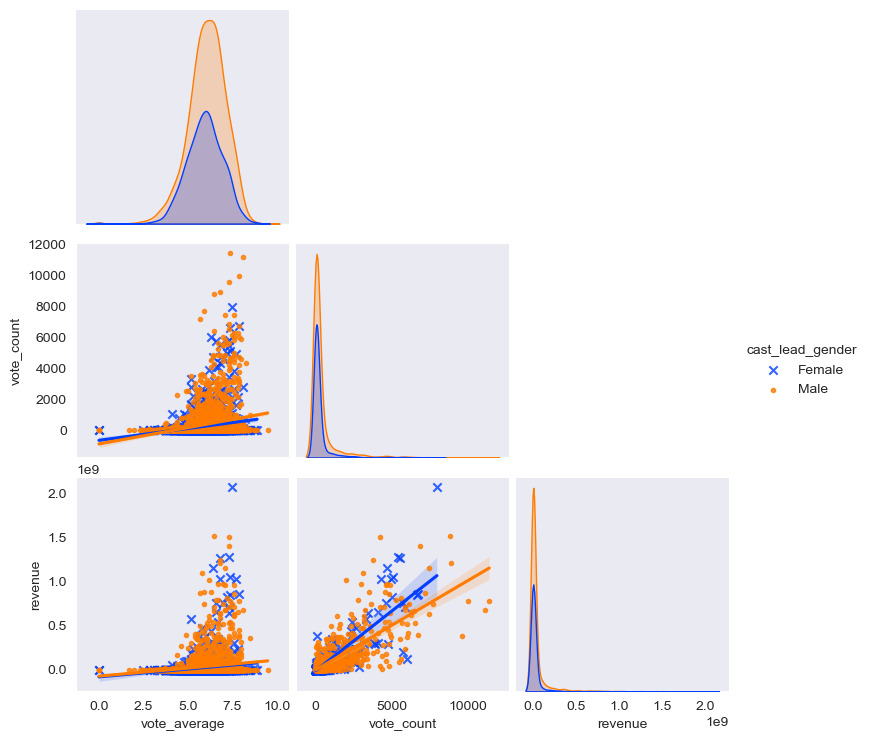

In [18]:
# min_votes of 100 -> 1315 movies, 
# min_votes of 10 -> 3767 movies
min_votes = 10
gender_rating_df = kaggle_cleaned_df.loc[kaggle_cleaned_df['vote_count'] >= min_votes,
                                         ['vote_average','vote_count','revenue','cast_lead_gender']]
print('num movies ', len(gender_rating_df))

# fig, ax = plt.subplots(figsize=(16,20))
data = gender_rating_df
sns.pairplot(kind='reg', hue='cast_lead_gender', palette='bright', data=data, markers=['x','.'], corner=True)
sns.set_style('darkgrid')
plt.show()

Movie Rating Distribution by Lead Cast Gender

num movies:  3767


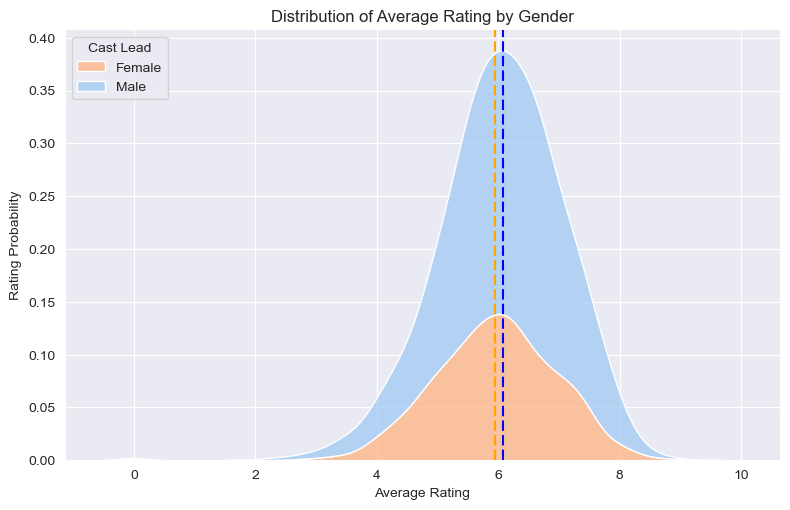

In [19]:
min_votes = 10
gender_rating_df = kaggle_cleaned_df.loc[kaggle_cleaned_df['vote_count'] >= min_votes,
                                         ['vote_average','vote_count','revenue','cast_lead_gender']]
print('num movies: ', len(gender_rating_df))


sns.set_style('darkgrid')

data = gender_rating_df
ax = sns.displot(x = 'vote_average', 
                 data=data, 
                 hue='cast_lead_gender', 
                 kind='kde', 
                 hue_order=['Male','Female'], 
                 palette='pastel', 
                 multiple='stack',
                 legend=False,
                 height=5, 
                 aspect=1.6).set(title='Distribution of Average Rating by Gender',
                                 xlabel='Average Rating',
                                 ylabel='Rating Probability')
plt.legend(title='Cast Lead', loc='upper left', labels=['Female', 'Male'])
female_mean = gender_rating_df.groupby('cast_lead_gender').mean().loc['Female', 'vote_average']
plt.axvline(female_mean,0,200, color='orange', dashes=[5,2])
male_mean = gender_rating_df.groupby('cast_lead_gender').mean().loc['Male', 'vote_average']
plt.axvline(male_mean,0,200, color='blue', dashes=[5,2])

plt.show()

Movie Profit Distribution by Lead Cast Gender

num movies:  564


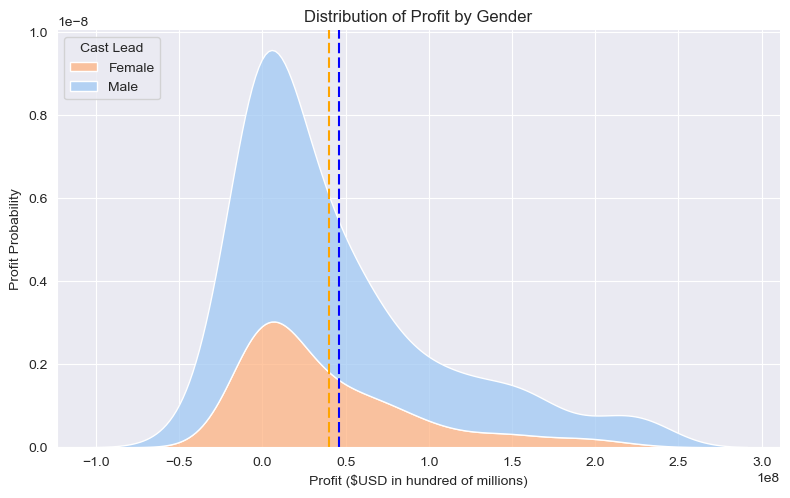

In [20]:
gender_profit_df = kaggle_cleaned_df[['title','release_date','revenue','cast_lead_gender']]
gender_profit_df = gender_profit_df.merge(modern_budgets_df[['movie','release_year','profit']],
                                          how='inner',
                                          left_on=['title','release_date'],
                                          right_on=['movie','release_year'],
                                          suffixes=['_l','_r'])
print('num movies: ', len(gender_profit_df))


sns.set_style('darkgrid')

data = gender_profit_df
column_name = 'profit'
ax = sns.displot(x = column_name, 
                 data=data, 
                 hue='cast_lead_gender', 
                 hue_order=['Male','Female'], 
                 multiple='stack',
                 palette='pastel', 
                 kind='kde', 
                 legend=False,
                 aspect=1.6).set(title='Distribution of Profit by Gender',
                                 xlabel='Profit ($USD in hundred of millions)',
                                 ylabel='Profit Probability')

plt.legend(title='Cast Lead', loc='upper left', labels=['Female', 'Male'])
female_mean = gender_profit_df.groupby('cast_lead_gender').mean().loc['Female', column_name]
plt.axvline(female_mean,0,200, color='orange', dashes=[5,2])
male_mean = gender_profit_df.groupby('cast_lead_gender').mean().loc['Male', column_name]
plt.axvline(male_mean,0,200, color='blue', dashes=[5,2])

plt.show()

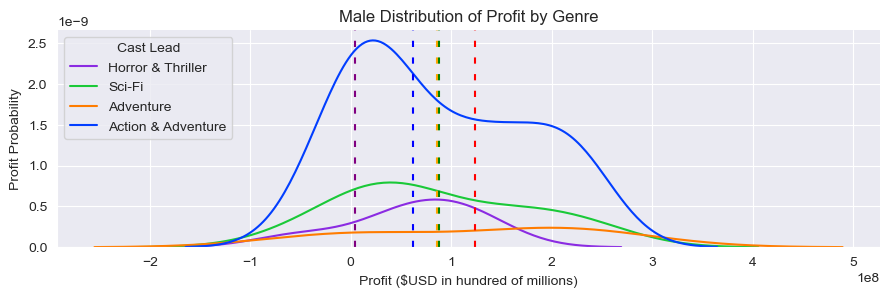

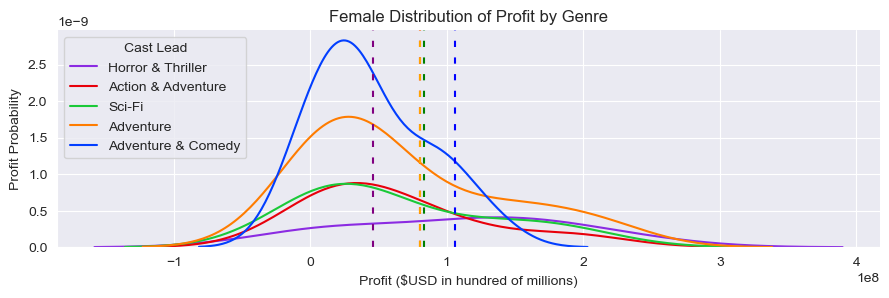

In [21]:
# gender_profit_genre_df contains -> cast lead gender, profit and genre for all films in top5 genres
# *Equal Number of male and female movies:
#   - Films with male lead actors are sampled to equal the population size of female movies
gender_profit_genre_df = kaggle_cleaned_df[['title','release_date','revenue','cast_lead_gender']]
gender_profit_genre_df = gender_profit_genre_df.merge(profit_genreTuples_df[['movie',
                                                                             'release_year',
                                                                             'profit',
                                                                             'genres']],
                                                      how='inner',
                                                      left_on=['title','release_date'],
                                                      right_on=['movie','release_year'],
                                                      suffixes=['_l','_r'])
genre_loc = gender_profit_genre_df['genres'].map(lambda x: x in top5_genre_combos)
gender_profit_genre_df = gender_profit_genre_df.loc[genre_loc]
gender_profit_genre_df['genres'] = gender_profit_genre_df['genres'].astype(str)

# sampling male lead actor movies to equal the population size of female movies
female_data = gender_profit_genre_df.loc[gender_profit_genre_df['cast_lead_gender'] == 'Female']
male_data   = gender_profit_genre_df.loc[gender_profit_genre_df['cast_lead_gender'] == 'Male']
male_data['weights'] = male_data['genres'].map(lambda x: male_data.groupby('genres').count()['title'].loc[x])
male_data_ = male_data.copy()
male_data = male_data_.sample(female_data.shape[0], weights='weights')
# repeat sample until all genres are represented
while(len(male_data['genres'].unique()) < 5):
    male_data = male_data_.sample(female_data.shape[0], weights='weights')

#Set plot Style
sns.set_style('darkgrid')
#Genre Tuples for labelling
top5_genre_combos = [('Adventure', 'Comedy'), 
                     ('Action', 'Adventure'), 
                     'Adventure', 
                     'Sci-Fi', 
                     ('Horror', 'Thriller')]

# plotting Male Distribution of Profit by Genre
data = male_data
column_name = 'profit'
ax = sns.displot(x = column_name, 
                 data=data, 
                 hue='genres',
                 palette='bright', 
                 kind='kde', 
                 legend=False,
                 height=3,
                 aspect=3).set(title='Male Distribution of Profit by Genre',
                                 xlabel='Profit ($USD in hundred of millions)',
                                 ylabel='Profit Probability')

# pl = ['Adventure & Comedy','Action & Adventure','Adventure','Sci-Fi','Horror & Thriller']
pl = get_pretty_labels(top5_genre_combos)
plt.legend(title='Cast Lead', loc='upper left', labels=[pl[4],pl[3],pl[2],pl[1],pl[0]])

#plotting Male mean lines
g = male_data.groupby('genres').mean()
idx = g.index

x = g.loc[idx[0]]['profit']
plt.axvline(x,0,200, color='orange', dashes=[3,5]) #ACtion

x = g.loc[idx[1]]['profit']
plt.axvline(x,0,200, color='blue', dashes=[3,5]) # comedy

x = g.loc[idx[2]]['profit']
plt.axvline(x,0,200, color='purple', dashes=[3,5]) # horror

x = g.loc[idx[3]]['profit']
plt.axvline(x,0,200, color='green', dashes=[3,5]) #adventure

x = g.loc[idx[4]]['profit']
plt.axvline(x,0,200, color='red', dashes=[3,5]) #scifi


# plotting Female Distribution of Profit by Genre
data = female_data
column_name = 'profit'
sns.displot(x = column_name, 
            data=data, 
            hue='genres', 
            palette='bright', 
            kind='kde', 
            legend=False,
            height=3,
            aspect=3).set(title='Female Distribution of Profit by Genre',
                                 xlabel='Profit ($USD in hundred of millions)',
                                 ylabel='Profit Probability')

#plotting Female mean lines
g = gender_profit_genre_df.groupby('genres').mean()
idx = g.index

x = g.loc[idx[0]]['profit']
plt.axvline(x,0,200, color='red', dashes=[3,5])

x = g.loc[idx[1]]['profit']
plt.axvline(x,0,200, color='blue', dashes=[3,5])

x = g.loc[idx[2]]['profit']
plt.axvline(x,0,200, color='purple', dashes=[3,5])

x = g.loc[idx[3]]['profit']
plt.axvline(x,0,200, color='orange', dashes=[3,5])

x = g.loc[idx[4]]['profit']
plt.axvline(x,0,200, color='green', dashes=[3,5])


# ['Adventure & Comedy','Action & Adventure','Adventure','Sci-Fi','Horror & Thriller']
pl = get_pretty_labels(top5_genre_combos)
plt.legend(title='Cast Lead', loc='upper left', labels=[pl[4],pl[1],pl[3],pl[2],pl[0]])



plt.show()

Write a README for a exploratory data analysis project given the following outline:
Introduction and Overview
 - Microsoft want to launch a new film studio, but they know very little about films, so we want to explore existing data to provide Microsoft with data-driven actionable insights to maximize profit, visibility and reception
 - We will be analyzing movie data from imdb, The Numbers and Kaggle for most profitable genres, movie runtime and choice of lead actor gender

Market and Business Understanding
 - Microsoft understands its huge Tech company, so we know they will garner much attention with their initial film releases, so let's make them good!
 - Microsoft is joining a competitive field where other originally-tech-based companies (such as Amazon, Netflix, Hulu) are launching film studios and having great success
 - We understand Microsoft stakeholders are making this decision to expand their business, and will measure the success of that expansion by how much profit they make
 - We are in the modern era of film, where streaming services are booming. Due to that we will be analyzing films only from 2013 to 2019. 2013 marks the beginning of this boom, as it was the year Netflix launched the show "House of Cards"
 - These are the key Questions we'll be addressing:
    - How much should we spend on production maximize profit?
    - What film genres and combinations of genres have been most profitable?
    - What is the distribution of movie runtimes in films with profitable genre choices?
    - Does the gender of the actor in a movie's lead role affect the movie's profitability?
    - Given a choice of gender, what genre is best?
    - Given a choice of genre, what gender is best?
 - Most Film studios throughout history have had to learn these business insights through trial and error over time. With proper exploratory data analysis, Microsoft can learn from others mistakes and increase their chances of a successful launch.

Data Understanding and Analysis
 - The Datasets we used are from imdb, The Numbers and Kaggle
    - imdb data contains information about the movie genres and runtime in minutes
       - 146k movies before data-cleaning for our analysis
    - The Numbers contains information about production budget and revenue for the films
       - ~5.5k movies before data-cleaning for our analysis
    - Kaggle's "The Movie Dataset" contains information about cast and actor gender
       - ~45k movies before data-cleaning for our analysis

Results:
 - Insight 1: Spend More to earn more. Risk of loss is especially above $50 million in production budget.
    - We can see from this visualization that there is a positive correlation between production budget and profit. 
    - We can also see around $ 50 million in budget there is a greatly reduced probability of a movie resulting in loss

 - Insight 2: Choose from one of the top 5 profitable genres.
   - This visualization shows the average profit per genre and genre combination category.
   - We made the decision to include only genre combinations with at least 40 samples as to not allow genres with few samples dominate the profit average. This makes the distribution more representative of our population. 
   - Each genre bin represents a sample of movies containing at least that genre or genre combination. 
    - In example: "Adventure & Comedy", representing the highest average profit, contains all films that are both adventure and comedy, as well as films that are action, comedy and some other genre.
   - A key insight to be taken from this chart is genre upscaling. For example, if Microsoft feels comfortable making a successful comedy movie, we would recommend you make an adventure & comedy movie to almost double your expected profit

Insight 3: Choose an appropriate runtime length, given a choice of genre
   - This visualization shows the distribution of movie runtime lengths for each of our top 5 genres
   - From this we can choose a runtime length that is appropriate for each genre since the distributions (except for 'Adventure') are all heavily skewed towards one clear choice.
   - Since we are choosing from proven profitable genres over the years, it is safe to assume that we want to emulate those common runtime choices.

Insight 4: Given a choice of actor in a movie's leading role, some genres are more profitable than others, depending on the actor's gender. Conversely, given a choice of genre, we can conclude a lead actor gender which is statistically more profitable.
 - The Male distribution was sampled to have an equal sample population as the Female distribution, so we may compare them without the risk of mean inflation.
 - By analyzing the mean and bulge distribution of these probability density functions, we can make decisions such as:
    - If we have a specific female actress in mind, a Horror & Thriller is the most profitable choice
    - If we have a specific male actor in mind, the most profitable genre combination to go with is Action & Comedy
    - If we are comfortable making a Horror & Thriller movie, a Female actress is the best choice
    - Finally the profit averages for males is very slightly higher than the profit averages for females. That being said, Microsoft is a highly influential company and have an opportunity to partake in building gender equality in the film industry for little net cost.

Conclusion
 - Spend more than $50 million to reduce the risk of loss, as the average high budget film will make more money than la ow budget film
 - Choose from one of these most profitable genre combinations, movie runtimes and lead actor gender (keeping in mind gender only slightly affects profit):
    - Adventure & Comedy, short, Male
    - Action Adventure, long, Male
    - Adventure, any, Male
    - Sci-Fi,  medium, Male
    - Horror Thriller, short, Female
 - choice of lead actor gender 
Future Improvements
 - Adjust profit values with inflation over the years
 - Work with streaming service dataset to incorporate valuable recent data
 - Require more data for analysis, so we may have sample sizes that better represent the population, especially for our gender analysis, which is a highly discussed topic and there is high demand for accurate data